# Classification Machine Learning
## Logistic Regression - Example 1

### Titanic Survical Analysis

In [20]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns      
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set()


In [21]:
train_data = pd.read_csv("Train_Titanic.csv")
test_data = pd.read_csv("Test_Titanic.csv")

In [22]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [24]:
survival = len(train_data[train_data['Survived']==1])
non_survival = len(train_data[train_data['Survived']==0])

In [25]:
print("Survival percentage is {0:.4}% and count is {1:}\n\
Non Survival percentage is {2:.4}% and count is {3:}".\
           format(survival/len(train_data)*100,survival,
           non_survival/len(train_data)*100,non_survival))

Survival percentage is 38.38% and count is 342
Non Survival percentage is 61.62% and count is 549


<AxesSubplot:xlabel='Pclass', ylabel='count'>

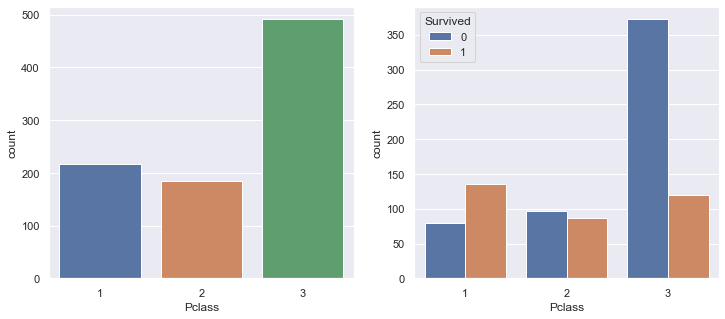

In [26]:
plt.figure(figsize=[12,5])           #Width, Height
plt.subplot(121)                     #Row, Column, Position
sns.countplot(x='Pclass', data = train_data)
plt.subplot(122)
sns.countplot(x='Pclass', hue='Survived', data = train_data )

<AxesSubplot:xlabel='Sex', ylabel='count'>

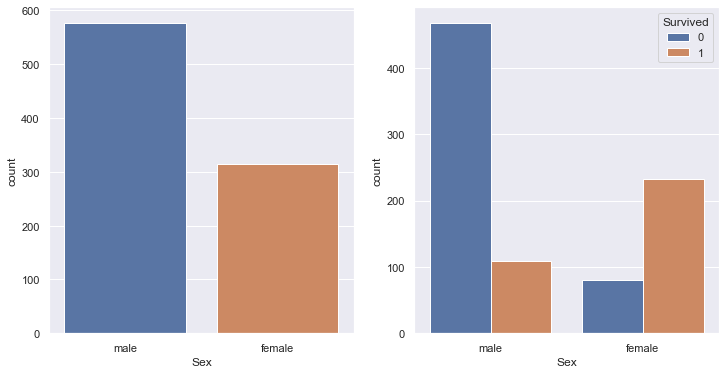

In [27]:

plt.figure(figsize=[12,6])
plt.subplot(121)
sns.countplot(x='Sex', data = train_data)
plt.subplot(122)
sns.countplot(x='Sex',hue='Survived', data = train_data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

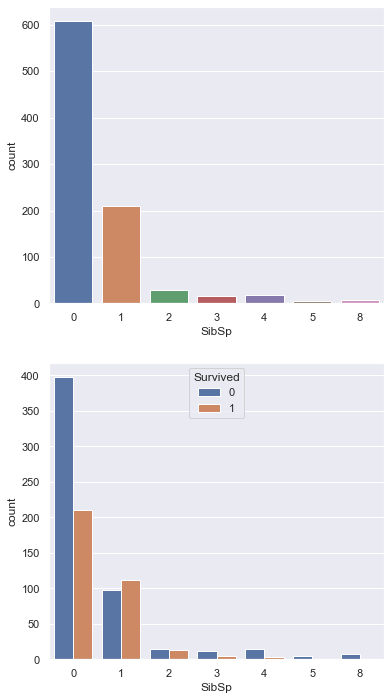

In [28]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data=train_data)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data=train_data)

<AxesSubplot:>

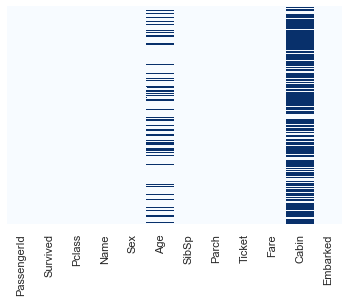

In [29]:
# Let's explore which dataset is missing
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [30]:
train_data.drop('Cabin',axis=1,inplace=True)
#Let's drop the embarked as well
train_data.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'],axis=1,inplace=True)

In [31]:
train_data

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0           0       3    male  22.0      1      0   7.2500
1           1       1  female  38.0      1      0  71.2833
2           1       3  female  26.0      0      0   7.9250
3           1       1  female  35.0      1      0  53.1000
4           0       3    male  35.0      0      0   8.0500
..        ...     ...     ...   ...    ...    ...      ...
886         0       2    male  27.0      0      0  13.0000
887         1       1  female  19.0      0      0  30.0000
888         0       3  female   NaN      1      2  23.4500
889         1       1    male  26.0      0      0  30.0000
890         0       3    male  32.0      0      0   7.7500

[891 rows x 7 columns]

<AxesSubplot:>

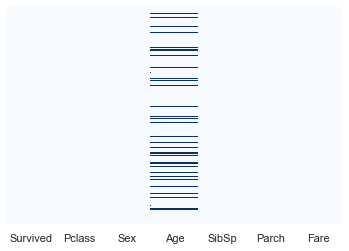

In [32]:
# Let's view the data one more time!
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

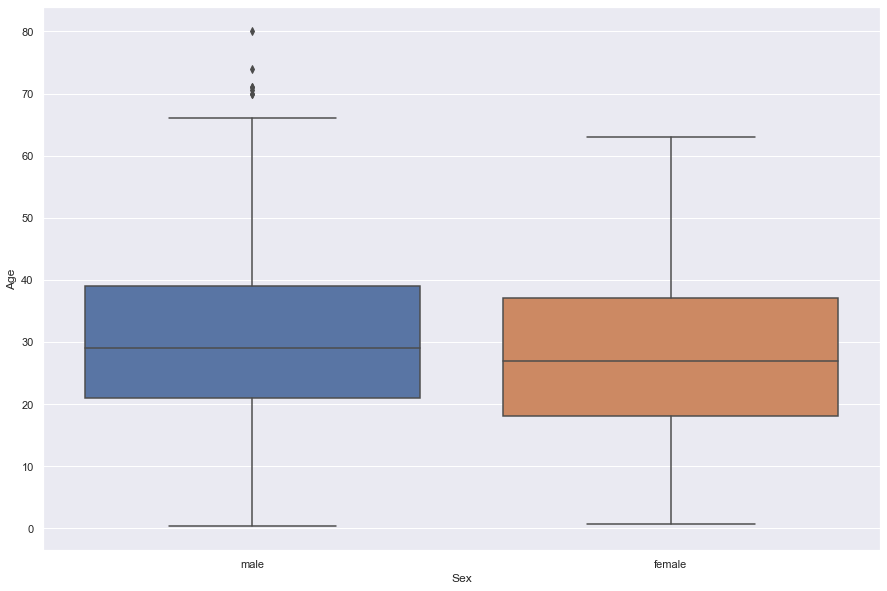

In [33]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=train_data)

In [41]:
np.mean(train_data['Age'][train_data['Sex']=='male'])\
, np.mean(train_data['Age'][train_data['Sex']=='female'])

(30.72664459161148, 27.915708812260537)

In [42]:
def Fill_Age(data):
    sex = data[0]
    age = data[1]

    if pd.isnull(age):
        if sex == 'male':
            return np.mean(train_data['Age'][train_data['Sex']=='male'])
        else:
            return np.mean(train_data['Age'][train_data['Sex']=='female'])
    else:
        return age
        
train_data['Age'] = train_data[['Sex','Age']].apply(Fill_Age, axis = 1)

<AxesSubplot:>

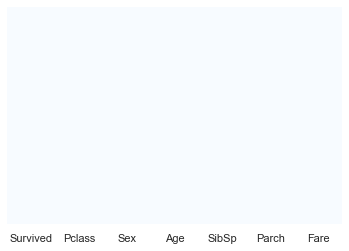

In [43]:
# Let's view the data one more time!
sns.heatmap(train_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [46]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [59]:
# Logistic regression cannot work with string. It is a type of one hot encoding, but pandas get_dummies work with string like one hot encoding of sklearn. 
train_data['Sex'] = pd.get_dummies(train_data['Sex'], drop_first = True)

In [65]:
X = train_data.drop('Survived',axis = 1).values
y = train_data['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Please note the datatype:
#### We are converting pandas series to numpy ndarray. Sklearn work on ndarray. 

In [61]:
type(train_data['Survived']), type(train_data['Survived'].values)

(pandas.core.series.Series, numpy.ndarray)

In [66]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = logi.predict(X_test)

In [75]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 13],
       [20, 54]], dtype=int64)

<AxesSubplot:>

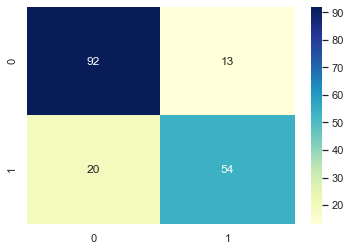

In [76]:
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

In [80]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

